# Fuzzy Based Model for Cancer Diagnosis 

## Introduction

Even though a lot of good algorithms like neural networks is getting edge over other Classical Algorithms, Fuzzy Logic remains the solution for very low computational expenses and for desicion making. Fuzzy Logic is one of the approach which basically created to make the system intelligent. This Notebook explores how Fuzzy based algorithms are applied to real world problems and can get good results. The Notebook Contains mainly 2 Approaches for solving this problem statement, and to build model for the Cancer Diagnosis.<br>

<b>Main Highlights</b>
- Data set: Breast Cancer Wisconsin (Diagnostic) 
- Approach 1: Applying Membership functions to features and obtaining the diagnostic result through Fuzzy Rules
- Approach 2: Applying Fuzzy C-Means Clustering and Predicting the cluster of the sample it belongs


### Importing Libraries 

In [1]:
# !pip install fuzzy-c-means
# !pip install scikit-fuzzy

import numpy as np
from fcmeans import FCM
from matplotlib import pyplot as plt
from sklearn.datasets import load_breast_cancer
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import seaborn as sns
from sklearn.metrics import confusion_matrix
import pandas as pd

In [2]:
data = load_breast_cancer()

In [3]:
data_1 = pd.DataFrame(data.data)
data_1.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
import pandas as pd

df = pd.DataFrame(data.data)
df['target'] = pd.DataFrame(data.target)

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## Approach 1

write how 

In [6]:
fuzzy_data =df.copy()
fuzzy_data['uniformity'] = fuzzy_data[20] - fuzzy_data[0]
fuzzy_data['homogeneity'] = fuzzy_data[28] - fuzzy_data[8]

In [7]:
fuzzy_data = fuzzy_data[[3, 2, 'uniformity', 'homogeneity', 'target']]
fuzzy_data.head()

,3,2,uniformity,homogeneity,target
0,1001.0,122.80,7.39,0.2182,0
1,1326.0,132.90,4.42,0.0938,0
2,1203.0,130.00,3.88,0.1544,0
3,386.1,77.58,3.49,0.4041,0
4,1297.0,135.10,2.25,0.0555,0


In [8]:
fuzzy_data.rename(columns={3: 'area_mean', 2: 'perimeter_mean'}, inplace=True)

In [9]:
fuzzy_data.describe()

,area_mean,perimeter_mean,uniformity,homogeneity,target
count,569.000000,569.000000,569.000000,569.000000,569.000000
mean,654.889104,91.969033,2.141898,0.108914,0.627417
std,351.914129,24.298981,1.658808,0.046960,0.483918
min,143.500000,43.790000,0.000000,0.000000,0.000000
25%,420.300000,75.170000,1.040000,0.079700,0.000000
50%,551.100000,86.240000,1.520000,0.100400,1.000000
75%,782.700000,104.100000,2.770000,0.128400,1.000000
max,2501.000000,188.500000,11.760000,0.404100,1.000000


In [10]:
AREA = ctrl.Antecedent(np.arange(0, 2501.000000, 0.0001), 'AREA')
PERIMETER = ctrl.Antecedent(np.arange(0, 188.500000, 0.0001), 'PERIMETER')
UNIFORMITY = ctrl.Antecedent(np.arange(0, 11.760000, 0.0001), 'UNIFORMITY')
HOMOGENEITY = ctrl.Antecedent(np.arange(0, 0.404100, 0.0001), 'HOMOGENEITY')

In [11]:
DIAGNOSIS = ctrl.Consequent(np.arange(0, 1, 0.0001), 'DIAGNOSIS')


c:\users\navaneethsharma2310\anaconda3\envs\sharma\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


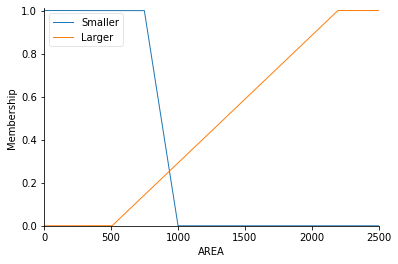

In [12]:
AREA['Smaller'] = fuzz.trapmf(AREA.universe, [0, 0, 748.8,1000])
AREA['Larger'] = fuzz.trapmf(AREA.universe, [508.1, 2194, 2501,2501])
AREA.view()

c:\users\navaneethsharma2310\anaconda3\envs\sharma\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


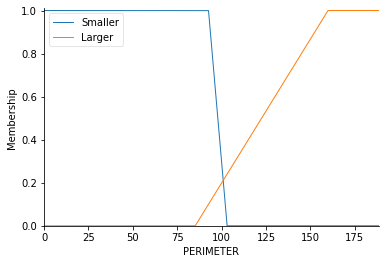

In [13]:
PERIMETER['Smaller'] = fuzz.trapmf(PERIMETER.universe, [0, 0, 92.58,103])
PERIMETER['Larger'] = fuzz.trapmf(PERIMETER.universe, [85.1, 159.8, 188.5,188.5])
PERIMETER.view()

c:\users\navaneethsharma2310\anaconda3\envs\sharma\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


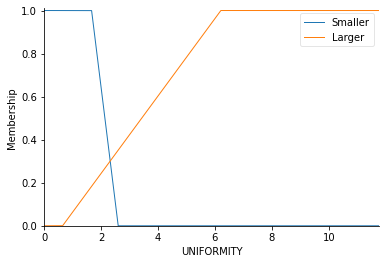

In [14]:
UNIFORMITY['Smaller'] = fuzz.trapmf(UNIFORMITY.universe, [0, 0, 1.669,2.6])
UNIFORMITY['Larger'] = fuzz.trapmf(UNIFORMITY.universe, [0.65, 6.205, 11.76,11.76])
UNIFORMITY.view()


c:\users\navaneethsharma2310\anaconda3\envs\sharma\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


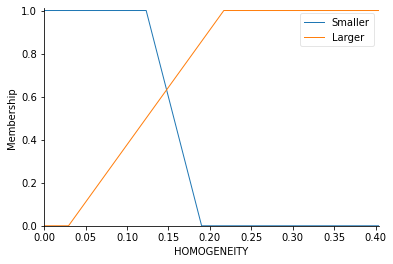

In [15]:
HOMOGENEITY['Smaller'] = fuzz.trapmf(HOMOGENEITY.universe, [0, 0, 0.1232,.19])
HOMOGENEITY['Larger'] = fuzz.trapmf(HOMOGENEITY.universe, [0.0295, 0.2168, 0.4041,0.4041])
HOMOGENEITY.view()

c:\users\navaneethsharma2310\anaconda3\envs\sharma\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


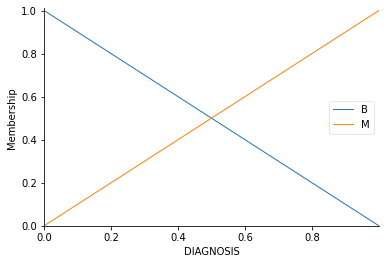

In [16]:
DIAGNOSIS['B'] = fuzz.trimf(DIAGNOSIS.universe, [0, 0, 1])
DIAGNOSIS['M'] = fuzz.trimf(DIAGNOSIS.universe, [0, 1, 1])
DIAGNOSIS.view()

In [17]:
rule1 = ctrl.Rule(AREA['Smaller'] & PERIMETER['Smaller'] & UNIFORMITY['Smaller'] & HOMOGENEITY['Smaller'], DIAGNOSIS['B'])
rule2 = ctrl.Rule(AREA['Larger'] & PERIMETER['Larger'] & UNIFORMITY['Larger'] & HOMOGENEITY['Larger'], DIAGNOSIS['M'])
Diag_ctrl = ctrl.ControlSystem([rule1, rule2])
Diag = ctrl.ControlSystemSimulation(Diag_ctrl)

In [18]:
y = df.iloc[:,-1].values
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [19]:
# A list to store predections generated by the fuzzy system
fuzzy_preds = []
# A list to store the equivilant real label, that's because we're skipping some rows, we'll talk why
fuzzy_real_vals = []

# looping over the rows of the dataset
for index, row in fuzzy_data.iterrows():
    
    #assigning antecedents values
    Diag.input['AREA'] = row['area_mean']
    Diag.input['PERIMETER'] = row['perimeter_mean']
    Diag.input['UNIFORMITY'] = row['uniformity']
    Diag.input['HOMOGENEITY'] = row['homogeneity']
    '''
    here we'll try to compute the output of the fuzzy system
    but why TRY ? why not compute it directly
    do you remember when we said we have a total of 16 rules for our fuzzy system
    and we're using only 2 of them becuase the rest outputs Undefined
    these undefined values will cause some errors so we'll just ignore these rows
    that why we're using Try Except, ok let's continue :D
    '''
    try:
        Diag.compute()
        
        #as we said the fuzzy system outputs value in range [0:1]
        #so here we discretize it and then store it
        fuzzy_preds.append(Diag.output['DIAGNOSIS'] > 0.5)
        fuzzy_real_vals.append(y[index])
    except:
        pass

In [20]:

print(len(y) - len(fuzzy_preds))


12


#### Predicting 

<AxesSubplot:>

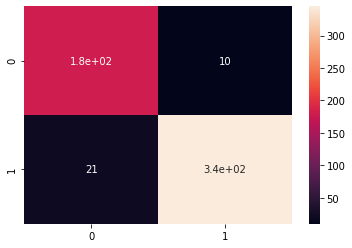

In [21]:
fuzzy_preds = [not elem for elem in fuzzy_preds]

cm_fuzz = confusion_matrix(fuzzy_preds, fuzzy_real_vals)
sns.heatmap(cm_fuzz,annot=True)

In [22]:
print("Fuzzy System accuracy is {}%".format(((cm_fuzz[0][0] + cm_fuzz[1][1])/cm_fuzz.sum())*100))

Fuzzy System accuracy is 94.43447037701975%


## Approach 2

In this Approach we consider the most important features, Here Only 2 features are considered for the visualization and understanding purpose. There are mainly 4 major steps
- Feature Selection
- Visulization
- Creating Fuzzy C-Means Model
- Result Analysis

### Feature Selection

This step involves to select top 2-3 features for the further steps. We are using ExtraTreesClassifier Model for this problem (as the o/p is already known). This will give some more insights about how important a feature is. And also Correlation b/w the feature is found to know how good the features correlate or decorrelate with target variable

#### Extra Trees Classifier for feature Selection
From this we get to know that Feature 27, 2, 13 are the most important features. But to make sure we will check for the Correlation 

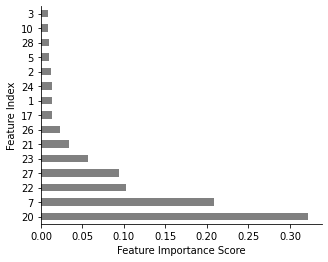

In [23]:
#use inbuilt class feature_importances of tree based classifiers
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier(n_estimators = 5, 
                                        criterion ='entropy', max_features = 12)
model.fit(df.drop(['target'],axis=1),df['target'])
plt.figure()
feat_importances = pd.Series(model.feature_importances_, index=df.drop(['target'],axis=1).columns)
ax = feat_importances.nlargest(15).plot(kind='barh',color='grey')
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature Index')
plt.subplots_adjust(left=0.25)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

#### Correlation for feature Selection

As the below graph and values suggest that 27, 22, 20, 7 are most correlated (negatively) 

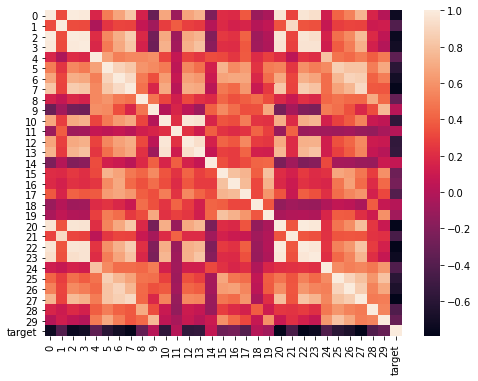

In [24]:
# !pip install seaborn
import seaborn as sb
plt.figure(figsize=(8, 6))

dataplot = sb.heatmap(df.corr(), annot=False)


In [25]:
corr_matrix = df.corr()
print(corr_matrix["target"].sort_values(ascending=False))

target    1.000000
14        0.067016
9         0.012838
11        0.008303
18        0.006522
19       -0.077972
16       -0.253730
15       -0.292999
29       -0.323872
8        -0.330499
4        -0.358560
17       -0.408042
1        -0.415185
28       -0.416294
24       -0.421465
21       -0.456903
13       -0.548236
12       -0.556141
10       -0.567134
25       -0.590998
5        -0.596534
26       -0.659610
6        -0.696360
3        -0.708984
0        -0.730029
23       -0.733825
2        -0.742636
20       -0.776454
7        -0.776614
22       -0.782914
27       -0.793566
Name: target, dtype: float64


### Visualization

From above its better to choose the combinations of 27,22,2,13. As below shown the 27 and 2 are the best combination in these (tried all combination), since its spead can visually separable

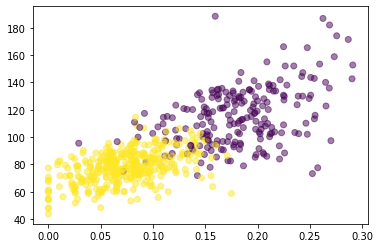

In [26]:
plt.scatter(data.data[:,27], data.data[:,2],c=data.target, alpha=0.5)
# plt.scatter(data.data[:,1], data.data[:,2],c=data.target)

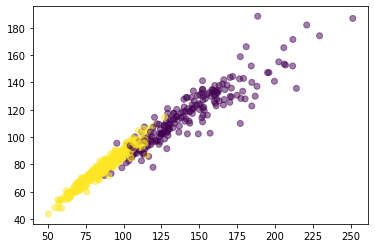

In [27]:
plt.scatter(data.data[:,22], data.data[:,2],c=data.target, alpha=0.5)

#### Preparing the data

In [28]:
X = [
    data.data[:,27], 
    data.data[:,2]
    ]

X = np.asarray(X)
np.asarray(X).shape

(2, 569)

### Using Fuzzy C-Means Clustering 

This algorithm works by assigning membership to each data point corresponding to each cluster center on the basis of distance between the cluster center and the data point. More the data is near to the cluster center more is its membership towards the particular cluster center. Clearly, summation of membership of each data point should be equal to one.

<b>Advantages</b>

1. Gives best result for overlapped data set and comparatively better then k-means algorithm.
2. Unlike k-means where data point must exclusively belong to one cluster center here data point is assigned membership to each cluster center as a result of which data point may belong to more then one cluster center.

<b>Disadvantages</b>
1. Apriori specification of the number of clusters.
2. With lower value of  β we get the better result but at the expense of  more number of iteration.
3. Euclidean distance measures can unequally weight underlying factors.

<b>Computing Fuzzy C-Means</b>

Since we need only 2 clusters for this problem we are making n_clusters=2

In [29]:
fcm = FCM(n_clusters=2)
fcm.fit(X.T)

In [30]:
X = X.T

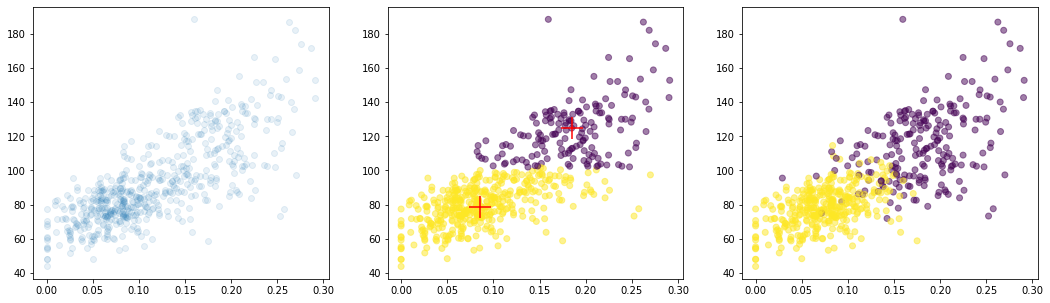

In [31]:
fcm_centers = fcm.centers
fcm_labels = fcm.predict(X)^1

# plot result
f, axes = plt.subplots(1, 3, figsize=(18,5))
axes[0].scatter(X[:,0], X[:,1], alpha=.1)
axes[1].scatter(X[:,0], X[:,1], c=fcm_labels, alpha=.5)
axes[1].scatter(fcm_centers[:,0], fcm_centers[:,1], marker="+", s=500, c='red')
axes[2].scatter(data.data[:,27], data.data[:,2],c=data.target, alpha=0.5)

# plt.savefig('images/basic-clustering-output.jpg')
plt.show()


c:\users\navaneethsharma2310\anaconda3\envs\sharma\lib\site-packages\seaborn\distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'linewidth'
  **contour_kws,


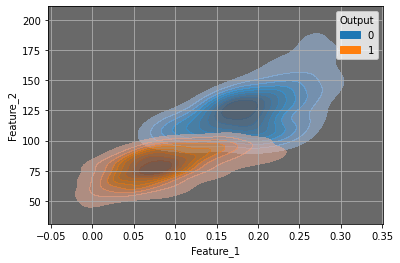

In [32]:
DF = pd.DataFrame()

DF['Feature_1'] = X[:,0]
DF['Feature_2'] = X[:,1]
DF['Output'] = fcm_labels

plt.figure(facecolor='w')
ax = sb.kdeplot(data=DF, x="Feature_1", y="Feature_2",hue='Output',fill=True, common_norm=False, 
   alpha=.5, linewidth=0,)
ax.grid()
ax.set_facecolor('#696969')